<a href="https://colab.research.google.com/github/priya5450/auth-session-main/blob/main/toxic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Binary classification**



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/toxic.csv', nrows=70000)

In [3]:
toxicity_columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [4]:
df['binary_toxic'] = df[toxicity_columns].max(axis=1)


print(df.head(10))


                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...      0   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK      1   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...      0   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...      0   
9  00040093b2687caa  alignment on this subject and which are contra...      0   

   severe_toxic  obscene  threat  insult  identity_hate  binary_toxic  
0             0        0       0    

In [5]:
print("Column names:", df.columns)

Column names: Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'binary_toxic'],
      dtype='object')


In [6]:
df = df.drop(columns=toxicity_columns)

In [7]:
print(df.head(10))

                 id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9  00040093b2687caa  alignment on this subject and which are contra...   

   binary_toxic  
0             0  
1             0  
2             0  
3             0  
4             0  
5             0  
6             1  
7             0  
8             0  
9    

**EDA**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            70000 non-null  object
 1   comment_text  70000 non-null  object
 2   binary_toxic  70000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ MB


In [9]:
df.describe()

,binary_toxic
count,70000.000000
mean,0.102386
std,0.303157
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
df.shape

(70000, 3)

In [11]:
df['binary_toxic'].value_counts()

binary_toxic
0    62833
1     7167
Name: count, dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

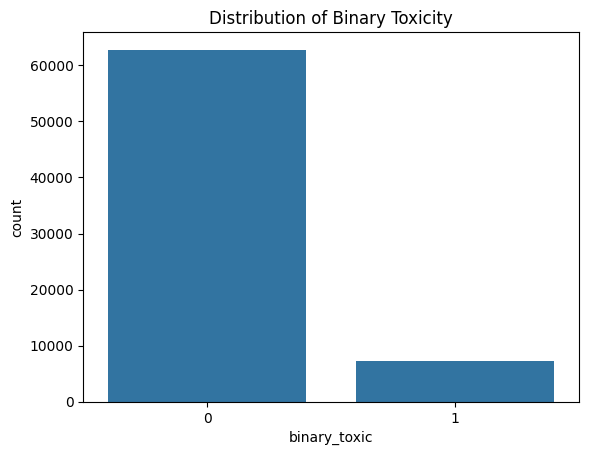

In [13]:
sns.countplot(x='binary_toxic', data=df)
plt.title('Distribution of Binary Toxicity')
plt.show()

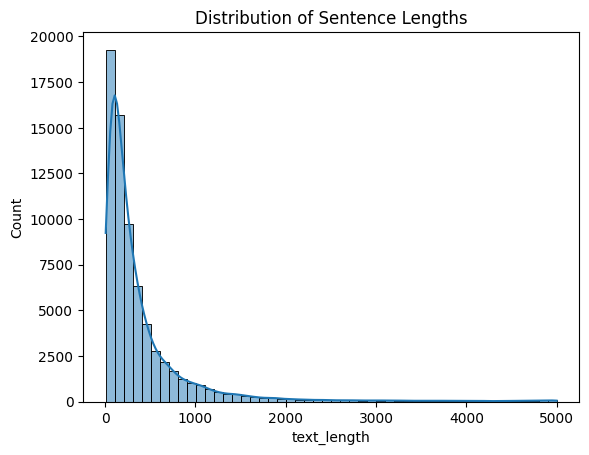

In [14]:
# Length of sentences
df['text_length'] = df['comment_text'].apply(len)
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Sentence Lengths')
plt.show()

**Word** **Cloud**

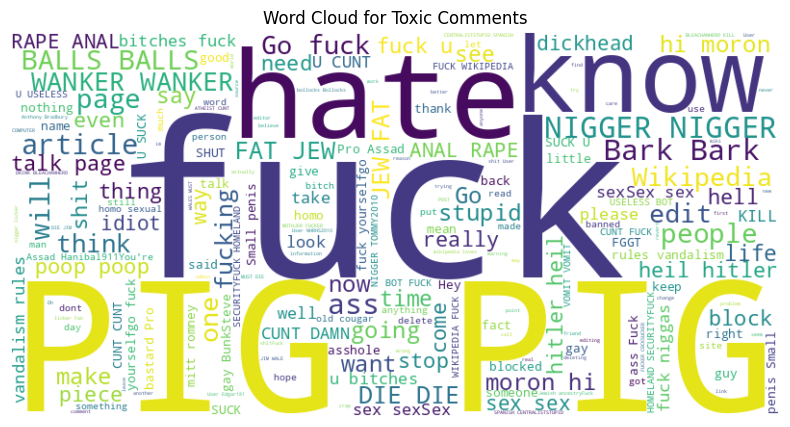

In [15]:
from wordcloud import WordCloud

# Generate word cloud for toxic comments
toxic_comments = ' '.join(df[df['binary_toxic'] == 1]['comment_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(toxic_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Toxic Comments')
plt.show()

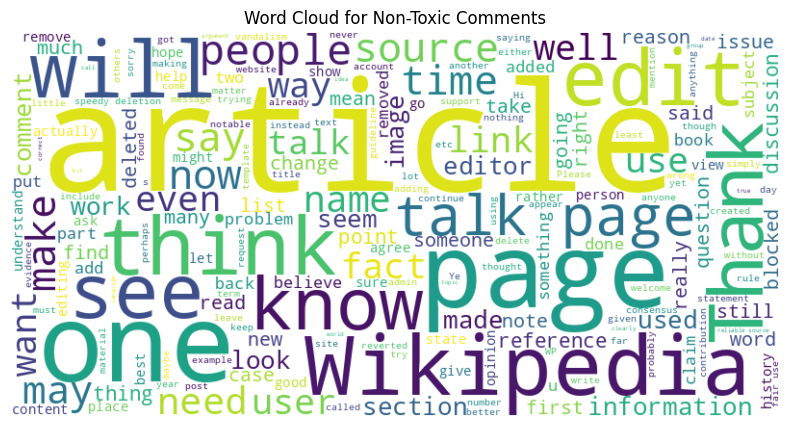

In [16]:
non_toxic_comments = ' '.join(df[df['binary_toxic'] == 0]['comment_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(non_toxic_comments)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Toxic Comments')
plt.show()

In [17]:
from collections import Counter
import nltk

# Tokenize the text
nltk.download('punkt')
toxic_tokens = nltk.word_tokenize(toxic_comments)
non_toxic_tokens = nltk.word_tokenize(non_toxic_comments)

# Get the most common words
toxic_word_freq = Counter(toxic_tokens)
non_toxic_word_freq = Counter(non_toxic_tokens)

# Get the top 20 common words
common_toxic_words = toxic_word_freq.most_common(20)
common_non_toxic_words = non_toxic_word_freq.most_common(20)

print("Common words in toxic comments:")
print(common_toxic_words)

print("Common words in non-toxic comments:")
print(common_non_toxic_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Common words in toxic comments:
[('!', 28272), ('.', 18061), (',', 14503), ('you', 11488), ('I', 9632), ('a', 9061), ('the', 8509), ('to', 7340), ('and', 6672), ('is', 5986), ("''", 5551), ('of', 5154), ('?', 4361), ('YOU', 4360), ('that', 3734), ('``', 3454), ('your', 3427), ('You', 3328), ('it', 3205), ('are', 3192)]
Common words in non-toxic comments:
[('.', 198290), (',', 193834), ('the', 188272), ('to', 120586), ("''", 101670), ('of', 91888), ('I', 88413), ('and', 86089), ('a', 80647), ('is', 70732), ('you', 69058), ('``', 65951), ('that', 63435), ('in', 55683), ('it', 50919), ('for', 41033), (')', 38673), ('not', 38633), ('(', 36300), ('on', 35741)]


In [18]:
# Percentage distribution of binary_toxic
percentage = df['binary_toxic'].value_counts(normalize=True) * 100
print(percentage)


binary_toxic
0    89.761429
1    10.238571
Name: proportion, dtype: float64


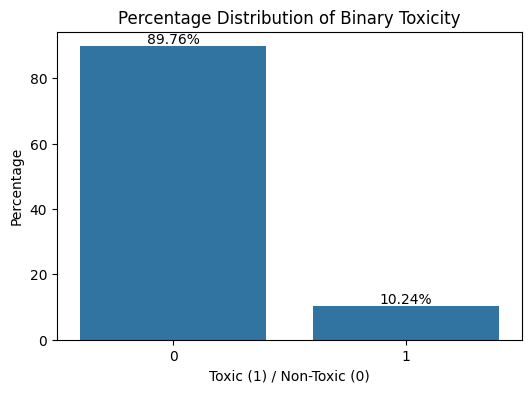

In [19]:
# Calculate the percentage distribution of binary_toxic
percentage_distribution = df['binary_toxic'].value_counts(normalize=True) * 100

# Plot the percentage distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=percentage_distribution.index, y=percentage_distribution.values)
plt.title('Percentage Distribution of Binary Toxicity')
plt.xlabel('Toxic (1) / Non-Toxic (0)')
plt.ylabel('Percentage')
for i, v in enumerate(percentage_distribution.values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')
plt.show()


**Preprocessing**

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Download stopwords
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
   # Lowercasing
    text = text.lower()

    # Removing punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization and removing stopwords
    words = [word for word in text.split() if word not in stop_words]

    # Lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # Joining words back to text
    return ' '.join(words)

df['cleaned_text'] = df['comment_text'].apply(preprocess_text)
print(df.head(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                 id                                       comment_text  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5  00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6  0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7  00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8  00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9  00040093b2687caa  alignment on this subject and which are contra...   

   binary_toxic  text_length  \
0             0          264   
1             0          112   
2             0          233   
3             0          622   
4             0          

In [21]:
print(df.head)

<bound method NDFrame.head of                      id                                       comment_text  \
0      0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1      000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2      000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3      0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4      0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                 ...                                                ...   
69995  bb461dce9e49ee8a  Article has been given new name \n\nWatch the ...   
69996  bb46a183632d6e30           HAHAHAHAHAH \n\nU CANT STOP ME LOLOLOLOL   
69997  bb46dec881cc3713  Vermont Department of Corrections\nPlease do n...   
69998  bb4733a3387f9936                             Talkback\n\n  (Say Hi)   
69999  bb4796932a383656  "\nI would suggest that the second sentence is...   

       binary_toxic  text_length 

**train test split**

In [22]:
from sklearn.model_selection import train_test_split

# Train/Test Split (80% train, 20% test)
X = df['cleaned_text']
y = df['binary_toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve


# BoW + Naive Bayes
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

y_pred = nb_model.predict(X_test_bow)
y_prob = nb_model.predict_proba(X_test_bow)[:, 1]

print("Naive Bayes with BoW")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


Naive Bayes with BoW
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12558
           1       0.87      0.55      0.67      1442

    accuracy                           0.94     14000
   macro avg       0.91      0.77      0.82     14000
weighted avg       0.94      0.94      0.94     14000

Accuracy: 0.9445714285714286
AUC: 0.8781909360815469


In [26]:
from sklearn.ensemble import RandomForestClassifier
# BoW + Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_bow, y_train)

y_pred = rf_model.predict(X_test_bow)
# y_prob = rf_model.predict_proba(X_test_bow)[:, 1]

print("Random Forest with BoW")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))

Random Forest with BoW
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12558
           1       0.92      0.57      0.70      1442

    accuracy                           0.95     14000
   macro avg       0.94      0.78      0.84     14000
weighted avg       0.95      0.95      0.95     14000

Accuracy: 0.9505
AUC: 0.9588849485957971


In [25]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

# BoW + LGBM
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Convert the sparse matrix to float32
X_train_bow = X_train_bow.astype(np.float32)
X_test_bow = X_test_bow.astype(np.float32)

lgbm_model_bow = LGBMClassifier()
lgbm_model_bow.fit(X_train_bow, y_train)

y_pred = lgbm_model_bow.predict(X_test_bow)
y_prob = lgbm_model_bow.predict_proba(X_test_bow)[:, 1]

print("LGBM with BoW")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


[LightGBM] [Info] Number of positive: 5725, number of negative: 50275
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 6.532161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 28088
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 6782
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.102232 -> initscore=-2.172665
[LightGBM] [Info] Start training from score -2.172665
LGBM with BoW
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12558
           1       0.90      0.64      0.75      1442

    accuracy                           0.96     14000
   macro avg       0.93      0.82      0.86     14000
weighted avg       0.95      0.96      0.95     14000

Accuracy: 0.9553571428571429
AUC: 0.9598378364886234


Tf-Idf

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(X_train_tfidf, y_train)

y_pred = nb_model_tfidf.predict(X_test_tfidf)
y_prob = nb_model_tfidf.predict_proba(X_test_tfidf)[:, 1]

print("Naive Bayes with TF-IDF")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


Naive Bayes with TF-IDF
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     12558
           1       1.00      0.16      0.27      1442

    accuracy                           0.91     14000
   macro avg       0.96      0.58      0.61     14000
weighted avg       0.92      0.91      0.88     14000

Accuracy: 0.913
AUC: 0.8603469085137059


In [28]:

# TF-IDF + Random Forest
rf_model_tfidf = RandomForestClassifier()
rf_model_tfidf.fit(X_train_tfidf, y_train)

y_pred = rf_model_tfidf.predict(X_test_tfidf)
y_prob = rf_model_tfidf.predict_proba(X_test_tfidf)[:, 1]

print("Random Forest with TF-IDF")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


Random Forest with TF-IDF
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     12558
           1       0.93      0.57      0.70      1442

    accuracy                           0.95     14000
   macro avg       0.94      0.78      0.84     14000
weighted avg       0.95      0.95      0.95     14000

Accuracy: 0.9507142857142857
AUC: 0.9586514688350906


In [29]:
# TF-IDF + LGBM
lgbm_model_tfidf = LGBMClassifier()
lgbm_model_tfidf.fit(X_train_tfidf, y_train)

y_pred = lgbm_model_tfidf.predict(X_test_tfidf)
y_prob = lgbm_model_tfidf.predict_proba(X_test_tfidf)[:, 1]

print("LGBM with TF-IDF")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


[LightGBM] [Info] Number of positive: 5725, number of negative: 50275
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 6.520538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322197
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 6782
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.102232 -> initscore=-2.172665
[LightGBM] [Info] Start training from score -2.172665
LGBM with TF-IDF
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12558
           1       0.90      0.65      0.76      1442

    accuracy                           0.96     14000
   macro avg       0.93      0.82      0.87     14000
weighted avg       0.96      0.96      0.95     14000

Accuracy: 0.9567857142857142
AUC: 0.9608225876316694


Hyperparameter Tuning


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from lightgbm import LGBMClassifier

# Assume the data is already preprocessed and loaded into df
# Assume the data has binary_toxic column and comment_text

# Preprocess the data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['comment_text'])
y = df['binary_toxic']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the LGBM model
lgbm = LGBMClassifier()

# Define the hyperparameter grid
param_grid = {
    'num_leaves': [20, 50, 100],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(lgbm, param_grid, scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Train the best model with the best parameters
best_lgbm = grid_search.best_estimator_
print(grid_search.best_estimator_)
best_lgbm.fit(X_train, y_train)

# Predict and evaluate
y_pred = best_lgbm.predict(X_test)
y_prob = best_lgbm.predict_proba(X_test)[:, 1]

print("\nLGBM with TF-IDF - Best Hyperparameters")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[LightGBM] [Info] Number of positive: 5725, number of negative: 50275
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 10.554906 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325341
[LightGBM] [Info] Number of data points in the train set: 56000, number of used features: 7508
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.102232 -> initscore=-2.172665
[LightGBM] [Info] Start training from score -2.172665
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 20, 'num_leaves': 20}
LGBMClassifier(learning_rate=0.2, max_depth=20, num_leaves=20)
[LightGBM] [Info] Number of positive: 5725, number of negative: 50275
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 10.424699 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[